## Practical Task 1

Plot scatter graph to gain insight between ages and insurance cost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
# Import the data
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


First of all, the first draft of the graph will include all general age and cost , and try to plot everything to see the general trend.

In general, the tendency will be the cost will increase with the age, but the it is obivious the data scatter sparsely, which there should be another factor bring a big difference in cost with the same age 

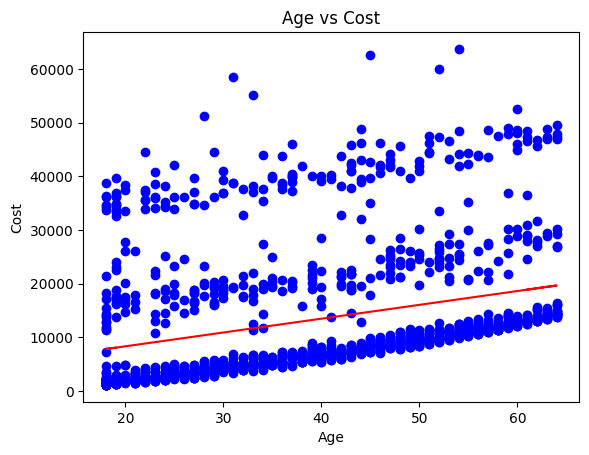

General Age Coefficients:  [257.72261867]
Estimated insurance cost for people in [[40]] should be: [13474.78975274]


In [12]:
# The iloc function allows use to select rows from the dataframe for plotting. Get age from the first row, and get Cost from the last row
age = insurance_data.iloc[:,:1].values
bmi = insurance_data.iloc[:,2:3].values
children = insurance_data.iloc[:,3:4].values
cost = insurance_data.iloc[:,-1].values

age_model = LinearRegression()
age_model.fit(age,cost)
cost_pred = age_model.predict(age)

plt.scatter(age,cost,color = 'b')
plt.plot(age,cost_pred,color = 'r')
plt.xlabel('Age')
plt.ylabel('Cost')
plt.title('Age vs Cost')
plt.show()

print('General Age Coefficients: ', age_model.coef_)

# Predict General Cost for 40 age people
unk_age = [[40]] 
print(f"Estimated insurance cost for people in {unk_age} should be:", age_model.predict(unk_age))

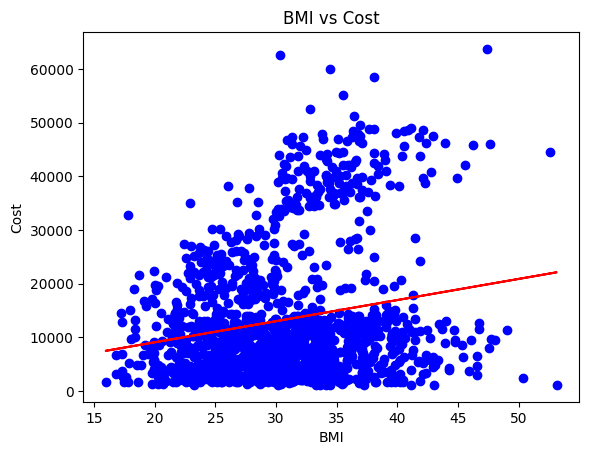

General BMI Coefficients:  [393.8730308]


In [17]:
# Plot BMI vs Cost

bmi_model = LinearRegression()
bmi_model.fit(bmi,cost)
cost_pred = bmi_model.predict(bmi)

plt.scatter(bmi,cost,color = 'b')
plt.plot(bmi,cost_pred,color = 'r')
plt.xlabel('BMI')
plt.ylabel('Cost')
plt.title('BMI vs Cost')
plt.show()

print('General BMI Coefficients: ', bmi_model.coef_)

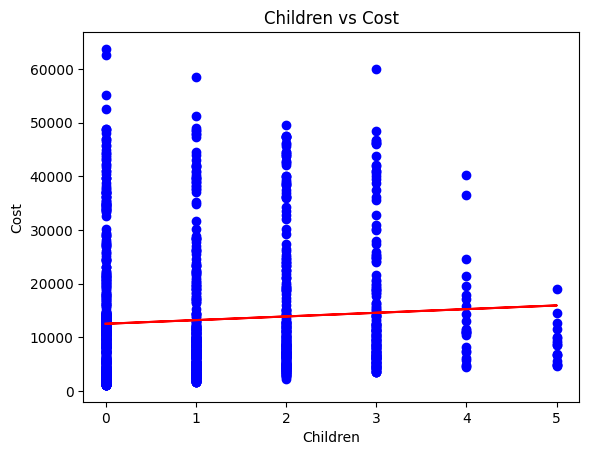

General Children Coefficients:  [683.08938248]


In [18]:
# Plot Children vs Cost

children_model = LinearRegression()
children_model.fit(children,cost)
cost_pred = children_model.predict(children)

plt.scatter(children,cost,color = 'b')
plt.plot(children,cost_pred,color = 'r')
plt.xlabel('Children')
plt.ylabel('Cost')
plt.title('Children vs Cost')
plt.show()

print('General Children Coefficients: ', children_model.coef_)

In [ ]:
## By comparing Age, BMI and Children

No of children and BMI have greater effect on the cost than the age. 

For finding important factor for affecting the coefficients,use blue for male, and red for female,



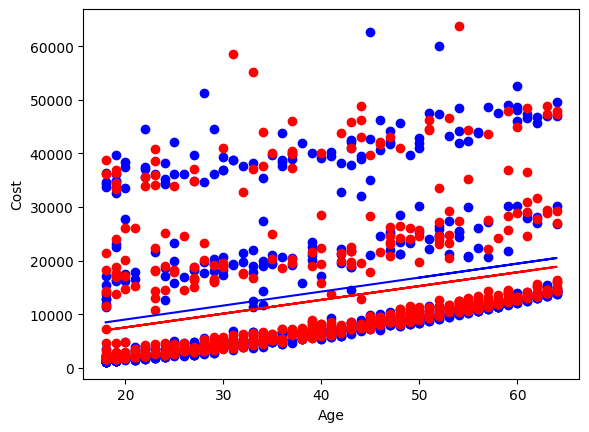

Male Coefficients:  [260.68133921]
Estimated insurance cost for male in [[40]] should be: [14239.02742077]
Female Coefficients:  [257.01148993]
Estimated insurance cost for female in [[40]] should be: [12697.30811904]


In [4]:
# Divide data set into Male and female, check the difference in coefficients

male_df = insurance_data[insurance_data.sex=="male"]
female_df = insurance_data[insurance_data.sex=="female"]

male_age = male_df.iloc[:,:1].values
male_cost = male_df.iloc[:,-1].values
male_insurance_model = LinearRegression()
male_insurance_model.fit(male_age,male_cost)
male_cost_pred = male_insurance_model.predict(male_age)

female_age = female_df.iloc[:,:1].values
female_cost = female_df.iloc[:,-1].values
female_insurance_model = LinearRegression()
female_insurance_model.fit(female_age,female_cost)
female_cost_pred = female_insurance_model.predict(female_age)

plt.scatter(male_age,male_cost,color = 'b')
plt.plot(male_age,male_cost_pred,color = 'b')
plt.scatter(female_age,female_cost,color = 'r')
plt.plot(female_age,female_cost_pred,color = 'r')
plt.xlabel('Age')
plt.ylabel('Cost')
plt.show()

# Predict General Cost for 40 age male and female
unk_age = [[40]] 
print('Male Coefficients: ', male_insurance_model.coef_)
print(f"Estimated insurance cost for male in {unk_age} should be:", male_insurance_model.predict(unk_age))
print('Female Coefficients: ', female_insurance_model.coef_)
print(f"Estimated insurance cost for female in {unk_age} should be:", female_insurance_model.predict(unk_age))

###　Conclusion for sex
The difference between two groups are not too big. 

So the next will be checking for smoking habit

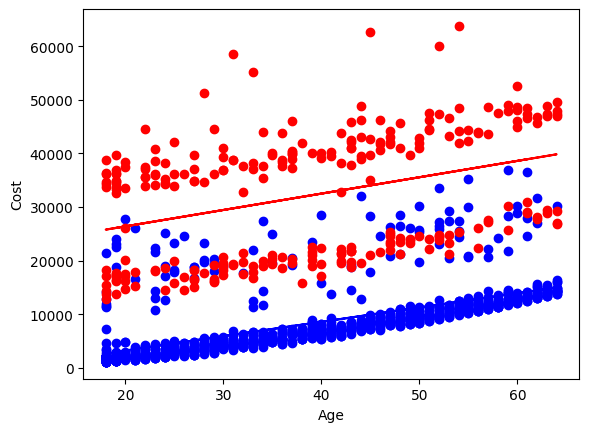

Smoker Coefficients:  [305.23760211]
Estimated insurance cost for smoker in [[40]] should be: [32503.63221131]
Nonsmoker Coefficients:  [267.24891283]
Estimated insurance cost for non-smoker in [[40]] should be: [8598.53595668]


In [5]:
smoker_df = insurance_data[insurance_data.smoker=="yes"]
nonsmoker_df = insurance_data[insurance_data.smoker=="no"]

smoker_age = smoker_df.iloc[:,:1].values
smoker_cost = smoker_df.iloc[:,-1].values
smoker_insurance_model = LinearRegression()
smoker_insurance_model.fit(smoker_age,smoker_cost)
smoker_cost_pred = smoker_insurance_model.predict(smoker_age)

nonsmoker_age = nonsmoker_df.iloc[:,:1].values
nonsmoker_cost = nonsmoker_df.iloc[:,-1].values
nonsmoker_insurance_model = LinearRegression()
nonsmoker_insurance_model.fit(nonsmoker_age,nonsmoker_cost)
nonsmoker_cost_pred = nonsmoker_insurance_model.predict(nonsmoker_age)

plt.scatter(nonsmoker_age,nonsmoker_cost,color = 'b')
plt.plot(nonsmoker_age,nonsmoker_cost_pred,color = 'b')
plt.scatter(smoker_age,smoker_cost,color = 'r')
plt.plot(smoker_age,smoker_cost_pred,color = 'r')
plt.xlabel('Age')
plt.ylabel('Cost')
plt.show()

# Predict General Cost for 40 age smoker and non-smoker
unk_age = [[40]] 

print('Smoker Coefficients: ', smoker_insurance_model.coef_)
print(f"Estimated insurance cost for smoker in {unk_age} should be:", smoker_insurance_model.predict(unk_age))
print('Nonsmoker Coefficients: ', nonsmoker_insurance_model.coef_)
print(f"Estimated insurance cost for non-smoker in {unk_age} should be:", nonsmoker_insurance_model.predict(unk_age))

## Conclusion
Smoker is an important factor for making a big difference in the insurnace cost aside from the variation of the age.